# D211 Data Cleaning
## Darian Gurrola

## External CSV Data Cleaning

In [3]:
#Import pandas to create a dataframe and import the external
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# Import the initial csv file and assign to df_computer
df_initial = pd.read_csv('ACSST1Y2022.S2801-Data.csv', header=1)

In [5]:
print(df_initial.head())

     Geography Geographic Area Name  Estimate!!Total!!Total households  \
0  0400000US01              Alabama                            2016448   
1  0400000US02               Alaska                             274574   
2  0400000US04              Arizona                            2850377   
3  0400000US05             Arkansas                            1216207   
4  0400000US06           California                           13550586   

   Margin of Error!!Total!!Total households  \
0                                     11475   
1                                      3261   
2                                     11519   
3                                      8435   
4                                     19485   

   Estimate!!Total!!Total households!!TYPES OF COMPUTER!!Has one or more types of computing devices:  \
0                                            1896102                                                   
1                                             267088            

In [6]:
#Select the columns that will be used in the analysis and assign to df_computer
df_computer = df_initial[["Geographic Area Name", "Estimate!!Total!!Total households", "Estimate!!Total!!Total households!!TYPE OF INTERNET SUBSCRIPTIONS!!With an Internet subscription:!!Broadband of any type!!Cellular data plan", "Estimate!!Total!!Total households!!TYPE OF INTERNET SUBSCRIPTIONS!!With an Internet subscription:!!Broadband of any type!!Broadband such as cable, fiber optic or DSL", "Estimate!!Percent!!Total households!!TYPES OF COMPUTER!!Has one or more types of computing devices:!!Tablet or other portable wireless computer", "Estimate!!Percent!!Total households!!TYPE OF INTERNET SUBSCRIPTIONS!!With an Internet subscription:!!Broadband of any type!!Broadband such as cable, fiber optic or DSL", "Estimate!!Percent!!Total households!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Less than $20,000:!!With a broadband Internet subscription", "Estimate!!Percent!!Total households!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!$20,000 to $74,999:!!With a broadband Internet subscription", "Estimate!!Percent!!Total households!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!$75,000 or more:!!With a broadband Internet subscription"]]

In [7]:
print(df_computer.head())

  Geographic Area Name  Estimate!!Total!!Total households  \
0              Alabama                            2016448   
1               Alaska                             274574   
2              Arizona                            2850377   
3             Arkansas                            1216207   
4           California                           13550586   

   Estimate!!Total!!Total households!!TYPE OF INTERNET SUBSCRIPTIONS!!With an Internet subscription:!!Broadband of any type!!Cellular data plan  \
0                                            1639736                                                                                              
1                                             239052                                                                                              
2                                            2395194                                                                                              
3                                            

## Check for missing values

In [9]:
#detect missing values in each variable of df_churn
df_computer.isnull().sum()

Geographic Area Name                                                                                                                                                             0
Estimate!!Total!!Total households                                                                                                                                                0
Estimate!!Total!!Total households!!TYPE OF INTERNET SUBSCRIPTIONS!!With an Internet subscription:!!Broadband of any type!!Cellular data plan                                     0
Estimate!!Total!!Total households!!TYPE OF INTERNET SUBSCRIPTIONS!!With an Internet subscription:!!Broadband of any type!!Broadband such as cable, fiber optic or DSL            0
Estimate!!Percent!!Total households!!TYPES OF COMPUTER!!Has one or more types of computing devices:!!Tablet or other portable wireless computer                                  0
Estimate!!Percent!!Total households!!TYPE OF INTERNET SUBSCRIPTIONS!!With an Internet subscription:!!Broa

## Rename columns

In [12]:
df_computer = df_computer.rename(columns = {"Geographic Area Name":"state", "Estimate!!Total!!Total households":"total households", "Estimate!!Total!!Total households!!TYPE OF INTERNET SUBSCRIPTIONS!!With an Internet subscription:!!Broadband of any type!!Cellular data plan":"cellular data plan (total)", "Estimate!!Total!!Total households!!TYPE OF INTERNET SUBSCRIPTIONS!!With an Internet subscription:!!Broadband of any type!!Broadband such as cable, fiber optic or DSL":"broadband such as cable, fiber optic, or dsl (total)", "Estimate!!Percent!!Total households!!TYPES OF COMPUTER!!Has one or more types of computing devices:!!Tablet or other portable wireless computer":"has one or more tablet (percent)", "Estimate!!Percent!!Total households!!TYPE OF INTERNET SUBSCRIPTIONS!!With an Internet subscription:!!Broadband of any type!!Broadband such as cable, fiber optic or DSL":"broadband such as cable, fiber optic, or dsl (percent)", "Estimate!!Percent!!Total households!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Less than $20,000:!!With a broadband Internet subscription":"less than $20,000 with broadband internet (percent)", "Estimate!!Percent!!Total households!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!$20,000 to $74,999:!!With a broadband Internet subscription":"$20,000 to $74,999 with broadband internet (percent)", "Estimate!!Percent!!Total households!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!$75,000 or more:!!With a broadband Internet subscription":"$75,000 or more with broadband internet (percent)"}) 

In [13]:
print(df_computer.head())

        state  total households  cellular data plan (total)  \
0     Alabama           2016448                     1639736   
1      Alaska            274574                      239052   
2     Arizona           2850377                     2395194   
3    Arkansas           1216207                      988480   
4  California          13550586                    12035392   

   broadband such as cable, fiber optic, or dsl (total)  \
0                                            1377556      
1                                             187858      
2                                            2169440      
3                                             815531      
4                                           10729302      

   has one or more tablet (percent)  \
0                              57.5   
1                              63.9   
2                              64.6   
3                              55.3   
4                              67.4   

   broadband such as cable, fib

In [14]:
#Rename values in State column 

#Find unique values of variable
print(df_computer["state"].unique())

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Puerto Rico']


In [15]:
#Create dictionary to store numeric values for variable
dict_state = {"state":
                    {"Alabama":"AL",
                     "Alaska":"AK",
                     "Arizona":"AZ",
                     "Arkansas":"AR",
                     "California":"CA",
                     "Colorado":"CO",
                     "Connecticut":"CT",
                     "Delaware":"DE",
                     "District of Columbia":"DC",
                     "Florida":"FL",
                     "Georgia":"GA",
                     "Hawaii":"HI",
                     "Idaho":"ID",
                     "Illinois":"IL",
                     "Indiana":"IN",
                     "Iowa":"IA",
                     "Kansas":"KS",
                     "Kentucky":"KY",
                     "Louisiana":"LA",
                     "Maine":"ME",
                     "Maryland":"MD",
                     "Massachusetts":"MA",
                     "Michigan":"MI",
                     "Minnesota":"MN",
                     "Mississippi":"MS",
                     "Missouri":"MO",
                     "Montana":"MT",
                     "Nebraska":"NE",
                     "Nevada":"NV",
                     "New Hampshire":"NH",
                     "New Jersey":"NJ",
                     "New Mexico":"NM",
                     "New York":"NY",
                     "North Carolina":"NC",
                     "North Dakota":"ND",
                     "Ohio":"OH",
                     "Oklahoma":"OK",
                     "Oregon":"OR",
                     "Pennsylvania":"PA",
                     "Rhode Island":"RI",
                     "South Carolina":"SC",
                     "South Dakota":"SD",
                     "Tennessee":"TN",
                     "Texas":"TX",
                     "Utah":"UT",
                     "Vermont":"VT",
                     "Virginia":"VA",
                     "Washington":"WA",
                     "West Virginia":"WV",
                     "Wisconsin":"WI",
                     "Wyoming":"WY",
                     "Puerto Rico":"PR"
                    }
                }

#Replace categorical values with numeric values from dictionary
df_computer.replace(dict_state, inplace=True)

#Confirm categorical values have been replaced
print(df_computer["state"].unique())

['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'FL' 'GA' 'HI' 'ID' 'IL'
 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE'
 'NV' 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY' 'PR']


In [16]:
df_computer.to_csv('computer_clean.csv', index=False)

## Location Table Cleaning

In [18]:
# Import the location csv file and assign to df_location
df_location = pd.read_csv('location.csv')

In [19]:
print(len(df_location))

8583


In [20]:
# Count rows in location table
print(df_location.head())

   location_id    zip           city state    county
0         5599  62419        Calhoun    IL  Richland
1         2737  32266  Neptune Beach    FL     Duval
2         1297  16424     Linesville    PA  Crawford
3         5181  58428         Dawson    ND    Kidder
4           30    952    Sabana Seca    PR  Toa Baja


In [21]:
#Detect duplicate rows in df_location
print(df_location.duplicated().value_counts())

False    8583
Name: count, dtype: int64


In [22]:
#detect missing values in each column of df_location
df_location.isnull().sum()

location_id    0
zip            0
city           0
state          0
county         0
dtype: int64

## Job Table Cleaning

In [24]:
# Import the job csv file and assign to df_job
df_job = pd.read_csv('job.csv')

In [25]:
print(df_job.head())

   job_id                         job_title
0       1                Academic librarian
1       2             Accommodation manager
2       3             Accountant- chartered
3       4   Accountant- chartered certified
4       5  Accountant- chartered management


In [92]:
print(len(df_job))

639


In [94]:
#Detect duplicate rows in df_churn 
print(df_job.duplicated().value_counts())

False    639
Name: count, dtype: int64


In [96]:
#detect missing values in each column of df_location
df_job.isnull().sum()

job_id       0
job_title    0
dtype: int64

## Customer Table Cleaning

In [29]:
# Import the customer csv file and assign to df_job
df_customer = pd.read_csv('customer.csv')

In [30]:
print(df_customer.head())

  customer_id       lat        lng  population  children  age    income  \
0     K409198  56.25100 -133.37571          38         0   68  28561.99   
1     S120509  44.32893  -84.24080       10446         1   27  21704.77   
2     K191035  45.35589 -123.24657        3735         4   50   9609.57   
3      D90850  32.96687 -117.24798       13863         1   48  18925.23   
4     K662701  29.38012  -95.80673       11352         0   83  40074.19   

     marital churn  gender  ...  email  contacts  yearly_equip_faiure  techie  \
0    Widowed    No    Male  ...     10         0                    1      No   
1    Married   Yes  Female  ...     12         0                    1     Yes   
2    Widowed    No  Female  ...      9         0                    1     Yes   
3    Married    No    Male  ...     15         2                    0     Yes   
4  Separated   Yes    Male  ...     16         2                    1      No   

   port_modem  tablet  job_id payment_id contract_id location_

In [98]:
print(len(df_customer))

10000


In [100]:
#Detect duplicate rows in df_customer
print(df_customer.duplicated().value_counts())

False    10000
Name: count, dtype: int64


In [32]:
#detect missing values in each column of df_location
df_customer.isnull().sum()

customer_id            0
lat                    0
lng                    0
population             0
children               0
age                    0
income                 0
marital                0
churn                  0
gender                 0
tenure                 0
monthly_charge         0
bandwidth_gp_year      0
outage_sec_week        0
email                  0
contacts               0
yearly_equip_faiure    0
techie                 0
port_modem             0
tablet                 0
job_id                 0
payment_id             0
contract_id            0
location_id            0
dtype: int64

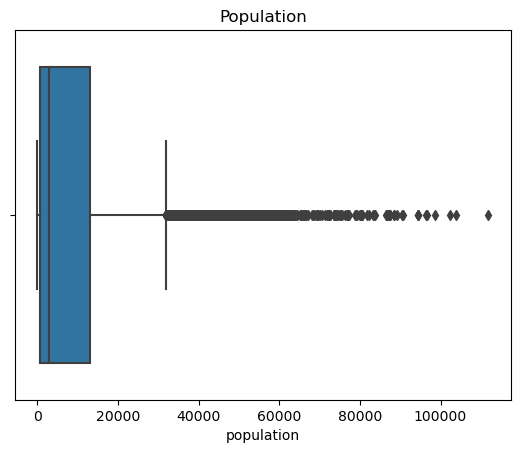

In [33]:
#Detect outliers in Population variable
boxplot = sns.boxplot(x="population", data = df_customer).set_title("Population")

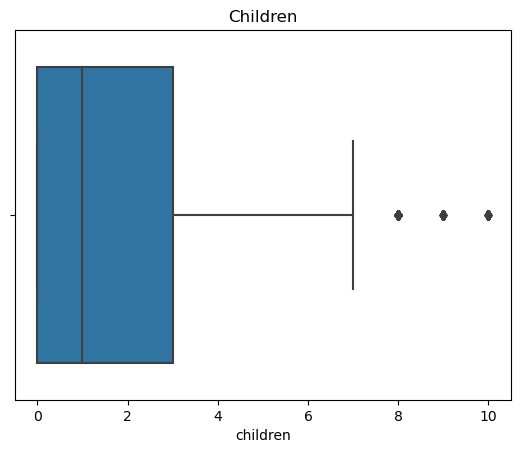

In [34]:
#Detect outliers in children variable
boxplot = sns.boxplot(x="children", data = df_customer).set_title("Children")

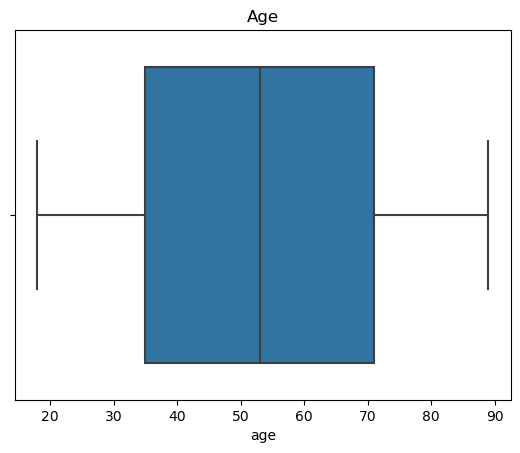

In [35]:
#Detect outliers in age variable
boxplot = sns.boxplot(x="age", data = df_customer).set_title("Age")

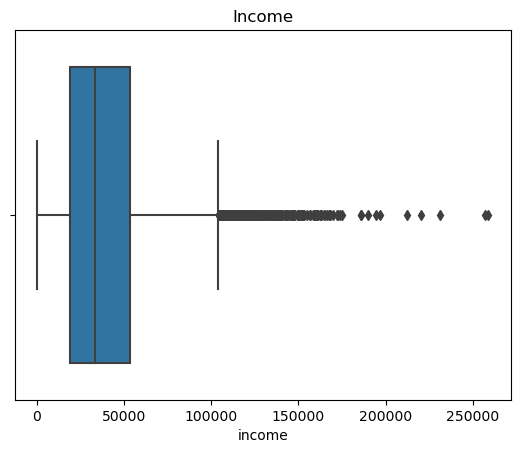

In [36]:
#Detect outliers in income variable
boxplot = sns.boxplot(x="income", data = df_customer).set_title("Income")

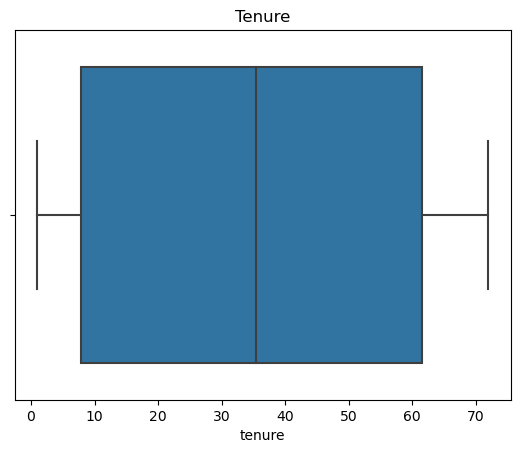

In [37]:
#Detect outliers in tenure variable
boxplot = sns.boxplot(x="tenure", data = df_customer).set_title("Tenure")

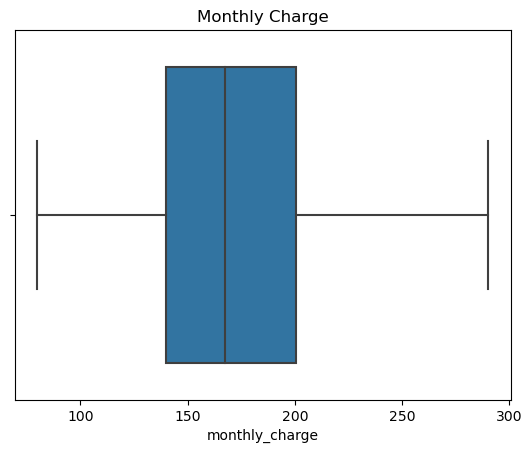

In [38]:
#Detect outliers in monthly_charge variable
boxplot = sns.boxplot(x="monthly_charge", data = df_customer).set_title("Monthly Charge")

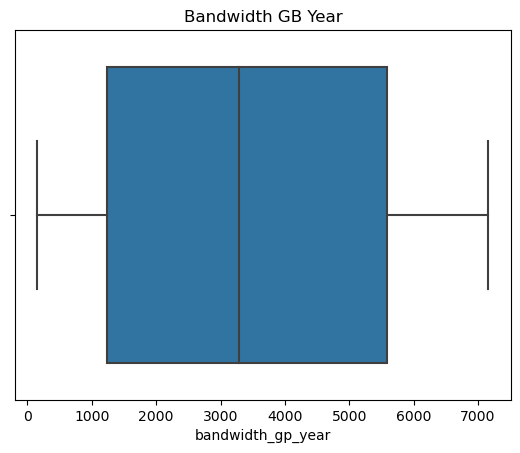

In [39]:
#Detect outliers in bandwidth_gp_year variable
boxplot = sns.boxplot(x="bandwidth_gp_year", data = df_customer).set_title("Bandwidth GB Year")

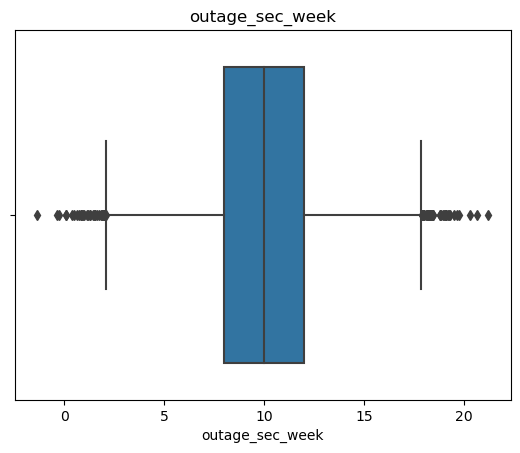

In [40]:
#Detect outliers in outage_sec_week variable
boxplot = sns.boxplot(x="outage_sec_week", data = df_customer).set_title("outage_sec_week")

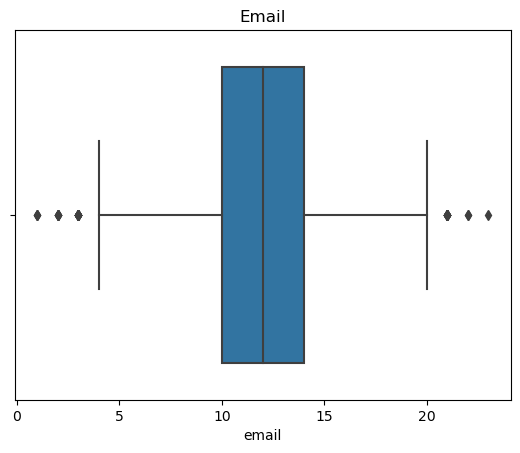

In [41]:
#Detect outliers in email variable
boxplot = sns.boxplot(x="email", data = df_customer).set_title("Email")

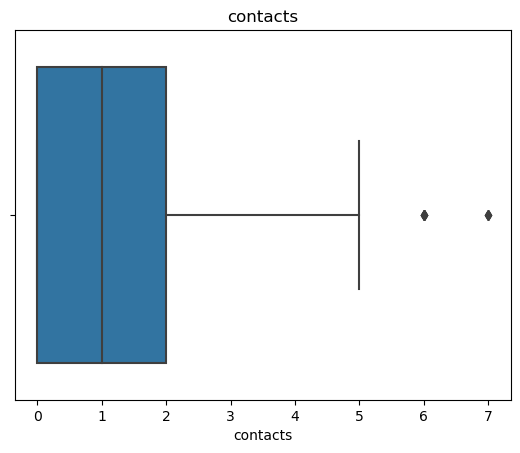

In [42]:
#Detect outliers in contacts variable
boxplot = sns.boxplot(x="contacts", data = df_customer).set_title("contacts")

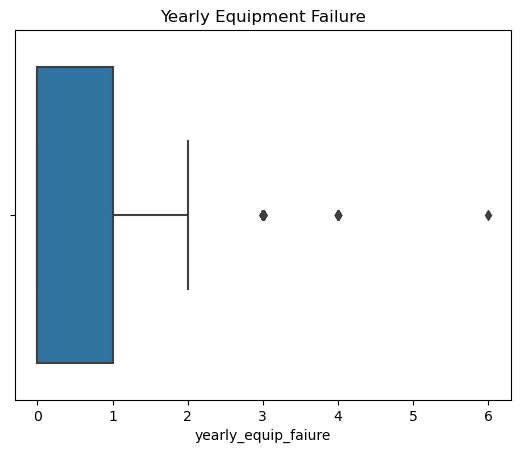

In [43]:
#Detect outliers in yearly_equip_faiure variable
boxplot = sns.boxplot(x="yearly_equip_faiure", data = df_customer).set_title("Yearly Equipment Failure")

In [44]:
print(min(df_customer['bandwidth_gp_year']))

155.5067148


## Payment Table Cleaning

In [46]:
# Import the payment csv file and assign to df_payment
df_payment = pd.read_csv('payment.csv')

In [47]:
print(df_payment.head())

   payment_id             payment_type
0           1  Bank Transfer Automatic
1           2    Credit Card Automatic
2           3         Electronic Check
3           4             Mailed Check


## Contract Table Cleaning

In [49]:
# Import the contract csv file and assign to df_contract
df_contract = pd.read_csv('contract.csv')

In [50]:
print(df_contract.head())

   contract_id        duration
0            1  Month-to-month
1            2        One year
2            3        Two Year
